# Economic Inequality in Latin America

### Trends in the Gini Index and its link to Average Income.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import plotly.express as px

### EDA

In [2]:
# Exploring .csv files from https://data.worldbank.org/indicator/SI.POV.GINI?type=points&year=2019 

df_1 = pd.read_csv("API_SI.POV.GINI_DS2_en_csv_v2_19376.csv",
                   delimiter=',',
                    skiprows=4,
                     engine='python')

df_1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,26.7,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.5,NaN,NaN,NaN


In [3]:
df_2 = pd.read_csv("Metadata_Country_API_SI.POV.GINI_DS2_en_csv_v2_19376.csv")
df_2

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [4]:
df_3 = pd.read_csv("Metadata_Indicator_API_SI.POV.GINI_DS2_en_csv_v2_19376.csv")
df_3

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SI.POV.GINI,Gini index,Gini index measures the extent to which the di...,"World Bank, Poverty and Inequality Platform. D...",NaN


In [5]:
# Extract column 'Latin America & Caribbean' from the dataframe 'df_2'
df_2[df_2['Region'] == 'Latin America & Caribbean']

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
9,ARG,Latin America & Caribbean,Upper middle income,The World Bank systematically assesses the app...,Argentina,NaN
12,ATG,Latin America & Caribbean,High income,NaN,Antigua and Barbuda,NaN
23,BHS,Latin America & Caribbean,High income,NaN,"Bahamas, The",NaN
26,BLZ,Latin America & Caribbean,Upper middle income,NaN,Belize,NaN
28,BOL,Latin America & Caribbean,Lower middle income,NaN,Bolivia,NaN
29,BRA,Latin America & Caribbean,Upper middle income,NaN,Brazil,NaN
30,BRB,Latin America & Caribbean,High income,NaN,Barbados,NaN
39,CHL,Latin America & Caribbean,High income,NaN,Chile,NaN
45,COL,Latin America & Caribbean,Upper middle income,NaN,Colombia,NaN


In [6]:
latinamerican_countries = df_2[df_2['Region'] == 'Latin America & Caribbean'] 

In [7]:
latinamerican_countries_by_income = latinamerican_countries.groupby('IncomeGroup')

In [8]:
latinamerican_countries_by_income.size()

IncomeGroup
High income            18
Lower middle income     4
Upper middle income    19
dtype: int64

In [9]:
latinamerican_income_distribution = latinamerican_countries['IncomeGroup'].value_counts().to_dict()
latinamerican_income_distribution

#hacer un plot de esto (Income per region)

{'Upper middle income': 19, 'High income': 18, 'Lower middle income': 4}

### Data Visualization

In [10]:
# Plotting latinoamerican income distribution
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

income_categories = list(latinamerican_income_distribution.keys())
country_counts = list(latinamerican_income_distribution.values())


<Figure size 1000x600 with 0 Axes>

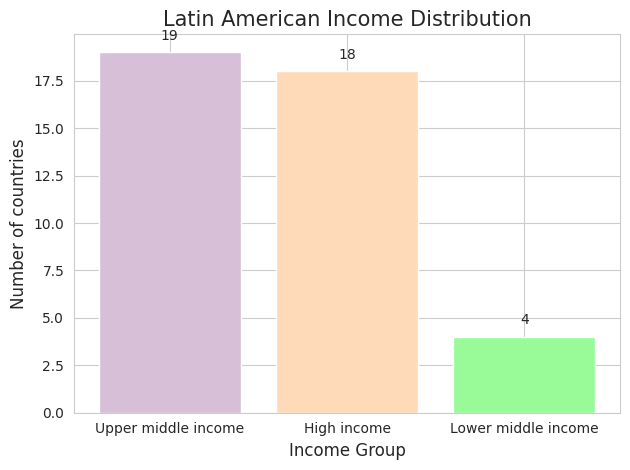

In [22]:
colors = ['#D8BFD8', '#FFDAB9', '#98FB98']
bars = plt.bar(income_categories, country_counts, color= colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height}', ha='center', va='bottom')
    plt.title('Latin American Income Distribution', fontsize=15)
    
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Number of countries', fontsize=12)

plt.tight_layout()
plt.show()

In [12]:
latinamerican_countries_by_income['TableName'].apply(list)

IncomeGroup
High income            [Aruba, Antigua and Barbuda, Bahamas, The, Bar...
Lower middle income                [Bolivia, Honduras, Haiti, Nicaragua]
Upper middle income    [Argentina, Belize, Brazil, Colombia, Costa Ri...
Name: TableName, dtype: object

In [13]:
latinamerican_countries_by_income_to_dict = latinamerican_countries_by_income['TableName'].apply(list).to_dict()
latinamerican_countries_by_income_to_dict

{'High income': ['Aruba',
  'Antigua and Barbuda',
  'Bahamas, The',
  'Barbados',
  'Chile',
  'Curaçao',
  'Cayman Islands',
  'Guyana',
  'St. Kitts and Nevis',
  'St. Martin (French part)',
  'Panama',
  'Puerto Rico',
  'Sint Maarten (Dutch part)',
  'Turks and Caicos Islands',
  'Trinidad and Tobago',
  'Uruguay',
  'British Virgin Islands',
  'Virgin Islands (U.S.)'],
 'Lower middle income': ['Bolivia', 'Honduras', 'Haiti', 'Nicaragua'],
 'Upper middle income': ['Argentina',
  'Belize',
  'Brazil',
  'Colombia',
  'Costa Rica',
  'Cuba',
  'Dominica',
  'Dominican Republic',
  'Ecuador',
  'Grenada',
  'Guatemala',
  'Jamaica',
  'St. Lucia',
  'Mexico',
  'Peru',
  'Paraguay',
  'El Salvador',
  'Suriname',
  'St. Vincent and the Grenadines']}

In [14]:
latam_high_income = latinamerican_countries_by_income_to_dict['High income']
latam_upper_middle_income = latinamerican_countries_by_income_to_dict['Upper middle income']
latam_lower_middle_income = latinamerican_countries_by_income_to_dict['Lower middle income']

In [15]:
latam_high_income

['Aruba',
 'Antigua and Barbuda',
 'Bahamas, The',
 'Barbados',
 'Chile',
 'Curaçao',
 'Cayman Islands',
 'Guyana',
 'St. Kitts and Nevis',
 'St. Martin (French part)',
 'Panama',
 'Puerto Rico',
 'Sint Maarten (Dutch part)',
 'Turks and Caicos Islands',
 'Trinidad and Tobago',
 'Uruguay',
 'British Virgin Islands',
 'Virgin Islands (U.S.)']

In [16]:
latam_upper_middle_income

['Argentina',
 'Belize',
 'Brazil',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Grenada',
 'Guatemala',
 'Jamaica',
 'St. Lucia',
 'Mexico',
 'Peru',
 'Paraguay',
 'El Salvador',
 'Suriname',
 'St. Vincent and the Grenadines']

In [17]:
latam_lower_middle_income

['Bolivia', 'Honduras', 'Haiti', 'Nicaragua']

In [26]:
# Plotting Latino American income groups on the world map

world = gpd.read_file('https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip')


In [30]:
#Checking columns from the dataframe 'world'
world.columns


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [31]:
# Detecting column of the code country
iso_column = 'ISO_A3'

# merging data for plot
merged_data = world.merge(latinamerican_countries, 
                          left_on=iso_column, 
                          right_on='Country Code', 
                          how='left')

In [32]:
# Subset data to Latin America and the Caribbean 
latam = merged_data[merged_data['Region'] == 'Latin America & Caribbean']

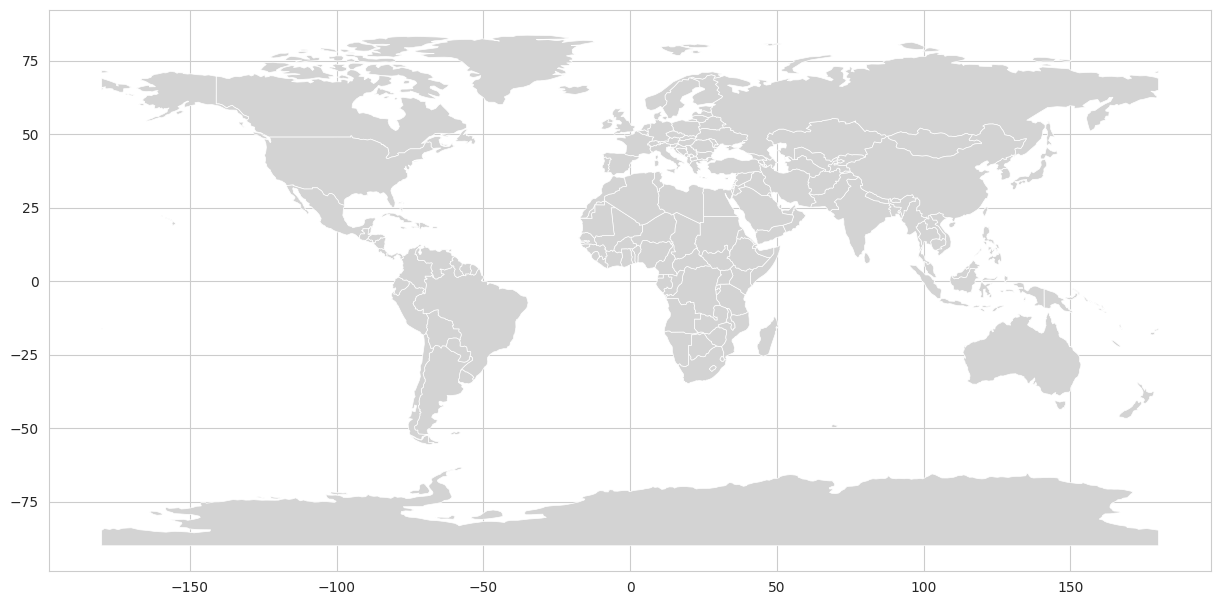

In [33]:
# Plot the world as a light gray background 

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

# Visualize Latin American countries, color-coded by income group
colors = {'High income': '#FFDAB9', 'Upper middle income': '#D8BFD8', 'Lower middle income': '#98FB98'}